In [159]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For Buiilding the Model
#from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

###Evaluation###
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Loading and Pre-processing data

In [160]:
### Load the data
df = pd.read_csv("song_data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.tail(n=100)

Size of the data: (18835, 14)


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Shrike,72,300706,0.464,0.387,0.278,0.005270,7,0.102,-8.454,0,0.0318,153.426,3,0.0632
Chemicals,72,199906,0.885,0.608,0.238,0.125000,0,0.111,-13.604,1,0.0434,78.013,4,0.2700
People Change,69,212853,0.884,0.374,0.276,0.012300,7,0.122,-14.945,1,0.0353,80.169,4,0.4120
Thousand (feat. Lisa Hannigan),69,206440,0.943,0.676,0.198,0.013200,1,0.104,-13.910,1,0.0333,118.004,4,0.1250
Old Friend,69,148200,0.811,0.412,0.241,0.392000,3,0.114,-13.477,1,0.0295,100.979,4,0.3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.3000
Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.2650
Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.2860


<AxesSubplot:>

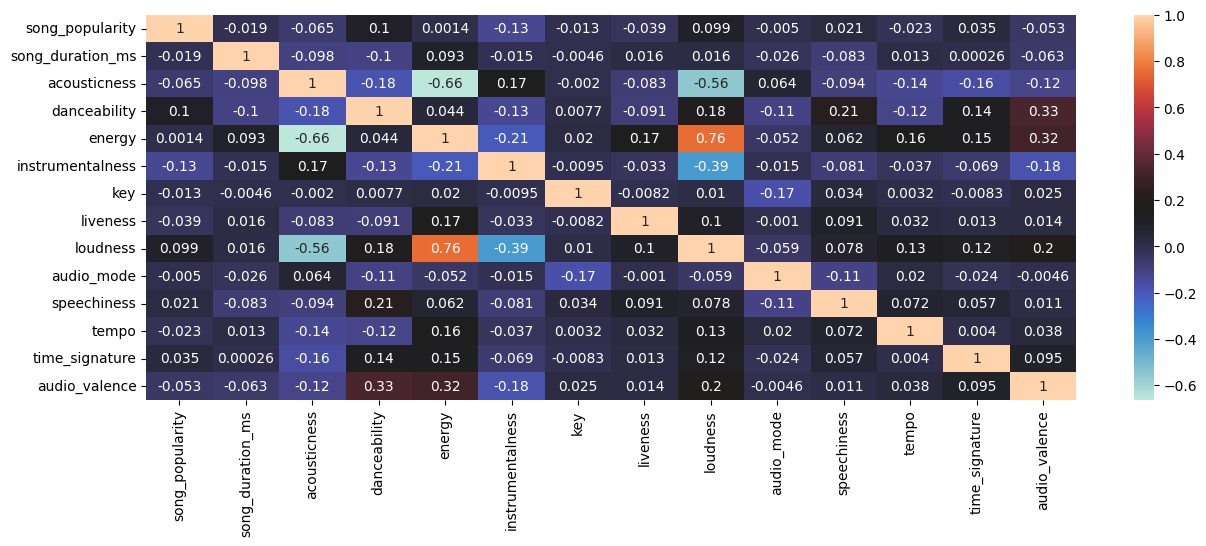

In [161]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(), cmap='icefire', annot=True, ax=ax)

## Dropping song popularity with other "irrelevant features"
### Using this dataset in getting the k-means

In [162]:
#Filter out features
song_feature = df.drop(['song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
y_test = df.song_popularity.values
song_feature.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,73,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
In The End,66,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
Seven Nation Army,76,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
By The Way,74,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
How You Remind Me,56,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

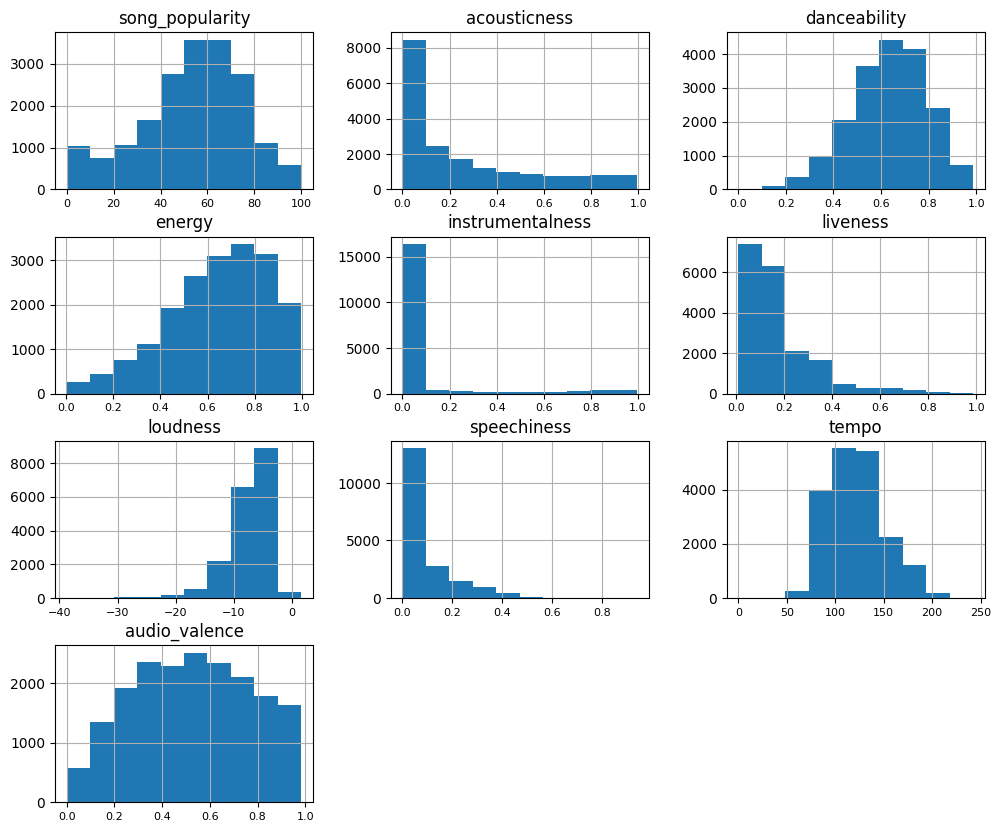

In [163]:
song_feature.hist(xlabelsize=8, figsize=(12,10))

### Descriptive Analysis

In [164]:
song_feature.describe(include='all')

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,0.258539,0.633348,0.644995,0.078008,0.179650,-7.447435,0.102099,121.073154,0.527967
std,21.905654,0.288719,0.156723,0.214101,0.221591,0.143984,3.827831,0.104378,28.714456,0.244632
min,0.000000,0.000001,0.000000,0.001070,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000
25%,40.000000,0.024100,0.533000,0.510000,0.000000,0.092900,-9.044000,0.037800,98.368000,0.335000
50%,56.000000,0.132000,0.645000,0.674000,0.000011,0.122000,-6.555000,0.055500,120.013000,0.527000
75%,69.000000,0.424000,0.748000,0.815000,0.002570,0.221000,-4.908000,0.119000,139.931000,0.725000
max,100.000000,0.996000,0.987000,0.999000,0.997000,0.986000,1.585000,0.941000,242.318000,0.984000


In [165]:
#Mean, Median, and Mode

print("\n----------- Calculate Mean -----------\n")
print(song_feature.mean())



----------- Calculate Mean -----------

song_popularity      52.991877
acousticness          0.258539
danceability          0.633348
energy                0.644995
instrumentalness      0.078008
liveness              0.179650
loudness             -7.447435
speechiness           0.102099
tempo               121.073154
audio_valence         0.527967
dtype: float64


In [166]:
print("\n----------- Calculate Median -----------\n")
print(song_feature.median())


----------- Calculate Median -----------

song_popularity      56.000000
acousticness          0.132000
danceability          0.645000
energy                0.674000
instrumentalness      0.000011
liveness              0.122000
loudness             -6.555000
speechiness           0.055500
tempo               120.013000
audio_valence         0.527000
dtype: float64


In [167]:
print("\n----------- Calculate Mode -----------\n")
print(song_feature.mode())


----------- Calculate Mode -----------

   song_popularity  acousticness  danceability  energy  instrumentalness  \
0             58.0          0.13         0.687   0.704               0.0   
1              NaN           NaN         0.694     NaN               NaN   

   liveness  loudness  speechiness    tempo  audio_valence  
0     0.108    -4.589       0.0337  125.978          0.961  
1       NaN       NaN          NaN      NaN            NaN  


In [168]:
#Standard Deviation

print(song_feature.std())

song_popularity     21.905654
acousticness         0.288719
danceability         0.156723
energy               0.214101
instrumentalness     0.221591
liveness             0.143984
loudness             3.827831
speechiness          0.104378
tempo               28.714456
audio_valence        0.244632
dtype: float64


### Standardized data

In [169]:
y_min = np.min(song_feature, axis=0)
y_max = np.max(song_feature, axis=0) 
y_std = (song_feature - y_min)/(y_max- y_min).values
shape = np.shape(y_std)
y_std

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,0.73,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707
In The End,0.66,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016
Seven Nation Army,0.76,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268
By The Way,0.74,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220
How You Remind Me,0.56,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333
...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.60,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878
Answers,0.60,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309
Sudden Love (Acoustic),0.23,0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650


### Using Elbow Method

In [170]:
def optimise_k(o_data, max_k):
    o_means = []
    o_inertias = []

    for o in range (1, max_k):
        ok_means = KMeans(n_clusters=o)
        ok_means.fit(o_data)

        o_means.append(o)
        o_inertias.append(ok_means.inertia_)

    fig = plt.subplots(figsize = (10,5))
    plt.plot(o_means, o_inertias, 'o-')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

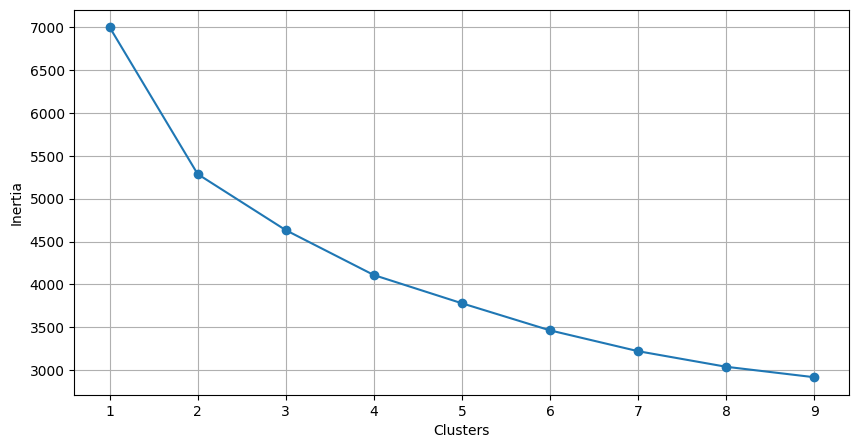

In [171]:
optimise_k(y_std, 10)

In [172]:
# Training and Predicting
kmeans_all = KMeans(n_clusters=2, random_state=0).fit(y_std)
preds = kmeans_all.predict(y_std)

y_std_copy = y_std.copy()
# Adding predictions to dataframe
y_std_copy['cluster'] = preds

# Grouping clusters to see the averages
cluster = y_std_copy \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')
#cluster.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,,
0,0.495129,0.699071,0.576028,0.390955,0.159651,0.151726,0.682880,0.084288,0.472742,0.436396
1,0.540808,0.122014,0.662242,0.724858,0.052762,0.179737,0.805363,0.116079,0.508066,0.567901


song_popularity - Cluster 0
acousticness - Cluster 1
danceability - Cluster 0
energy - Cluster 3
instrumentalness - Cluster 2
liveness - Cluster 2
loudness - Cluster 0
speechiness - Cluster - 1
tempo - Cluster 3
audio_valence - Cluster 2

#### Danceability, loudness and energy

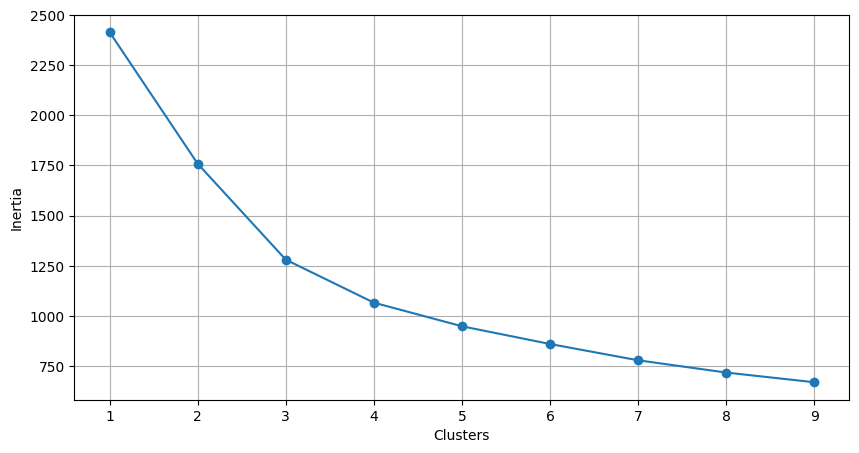

In [173]:
# Select the features to use for clustering
X = y_std[['song_popularity','danceability', 'loudness', 'energy']]
optimise_k(X, 10)

In [174]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X)
preds = kmeans_model.predict(X)

#y_std_copy = .copy()
# Adding predictions to dataframe
X['cluster'] = preds

# Grouping clusters to see the averages
cluster = X \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2420\1415904619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = preds


,song_popularity,danceability,loudness,energy
cluster,,,,
0,0.672872,0.675363,0.814397,0.732754
1,0.269208,0.629959,0.799925,0.739752
2,0.519792,0.582316,0.666213,0.347624


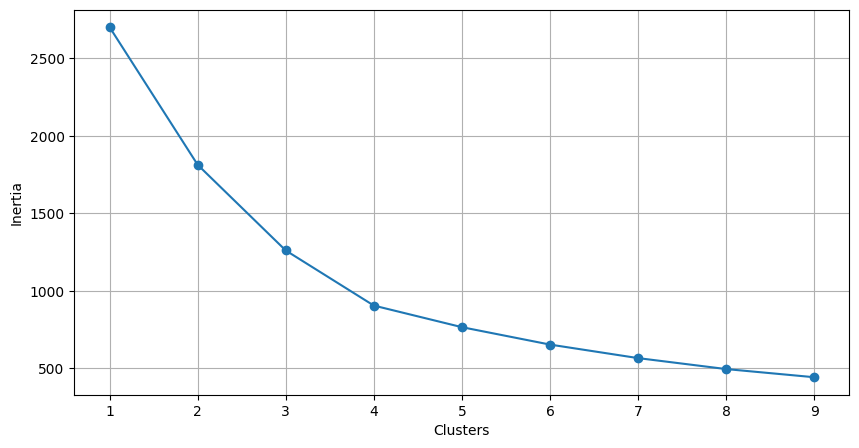

In [175]:
# Select the features to use for clustering
Z = y_std[['song_popularity','instrumentalness', 'energy']]
optimise_k(Z, 10)

#### Instrumentalness vs Energy

In [176]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=0).fit(Z)
preds = kmeans_model.predict(Z)

#y_std_copy = .copy()
# Adding predictions to dataframe
Z['cluster'] = preds

# Grouping clusters to see the averages
cluster = Z \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2420\2599778946.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['cluster'] = preds


,song_popularity,instrumentalness,energy
cluster,,,
0,0.671895,0.012649,0.768619
1,0.569442,0.017305,0.416565
2,0.440773,0.794342,0.501352
3,0.249081,0.021942,0.722322


### Training dataset

In [177]:
y = y_std_copy.cluster.values
x = y_std_copy.drop(['cluster'],axis=1)
x

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,0.73,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707
In The End,0.66,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016
Seven Nation Army,0.76,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268
By The Way,0.74,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220
How You Remind Me,0.56,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333
...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.60,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878
Answers,0.60,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309
Sudden Love (Acoustic),0.23,0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650


In [178]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state = 42)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (13184, 10)
y_train size: (13184,)

x_test size: (5651, 10)
y_test size: (5651,)


In [179]:
from sklearn.svm import SVC

# Create an instance of the SVC class
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
pred_svm = svm.predict(x_test)

#Evaluating model
acc_svc = accuracy_score(pred_svm,y_test)
pres_svc = precision_score(pred_svm,y_test)
rec_svc = recall_score(pred_svm,y_test)
auc_svc = roc_auc_score(y_test, pred_svm)

print("precision:", precision_score(pred_svm,y_test))
print("recall:", recall_score(pred_svm,y_test))
print("accuracy:", acc_svc)
print("AUC:",auc_svc)

precision: 0.9981338931653837
recall: 0.9969711090400746
accuracy: 0.9962838435675102
AUC: 0.9943015506882636


In [180]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(x_train, y_train)

# Make predictions on the test data
pred_log = logistic_regression.predict(x_test)

#Evaluating model
pres_log= precision_score(pred_log,y_test)
rec_log= recall_score(pred_log,y_test)
acc_log=accuracy_score(pred_log,y_test)
auc_log = roc_auc_score(y_test, pred_log)

###Printing out results###
print("precision:", precision_score(pred_log,y_test))
print("recall:", recall_score(pred_log,y_test))
print("accuracy:", acc_log)
print("AUC:",auc_log)

precision: 0.999766736645673
recall: 0.9951242163919202
accuracy: 0.9961068837373916
AUC: 0.9921854211087603


In [181]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
random_forest = RandomForestClassifier()

# Train the model on the training data
random_forest.fit(x_train, y_train)

# Make predictions on the test data
pred_forest = random_forest.predict(x_test)

#Evaluating model
acc_randforest= accuracy_score(pred_forest,y_test)
pres_randforest=precision_score(pred_forest,y_test)
rec_randforest = recall_score(pred_forest,y_test)
auc_randforest = roc_auc_score(y_test, pred_forest)

###Printing out results###
print("precision:", precision_score(pred_forest,y_test))
print("recall:", recall_score(pred_forest,y_test))
print("accuracy:", acc_randforest)
print("AUC:",auc_randforest)

precision: 0.9972008397480756
recall: 0.990271021542738
accuracy: 0.9904441691735976
AUC: 0.9832045254458853


In [182]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
pred_knn = knn.predict(x_test)

#Evaluating model
acc_knn=accuracy_score(pred_knn,y_test)
pres_knn= precision_score(pred_knn,y_test)
rec_knn = recall_score(pred_knn,y_test)
auc_knn = roc_auc_score(y_test, pred_knn)

###Printing out results###
print("precision:", precision_score(pred_knn,y_test))
print("recall:", recall_score(pred_knn,y_test))
print("accuracy:", acc_knn)
print("AUC:",auc_knn)

precision: 0.9953347329134593
recall: 0.9838598109292137
accuracy: 0.9840736152893294
AUC: 0.9720075424098089


In [183]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
pred_tree = decision_tree.predict(x_test)

#Evaluating model
acc_tree= accuracy_score(pred_tree,y_test)
pres_tree= precision_score(pred_tree,y_test)
rec_tree = recall_score(pred_tree,y_test)
auc_tree = roc_auc_score(y_test, pred_tree)

###Printing out results###
print("precision:", precision_score(pred_tree,y_test))
print("recall:", recall_score(pred_tree,y_test))
print("accuracy:", acc_tree)
print("AUC:",auc_tree)

precision: 0.9923023093072079
recall: 0.9895324494068388
accuracy: 0.9861971332507521
AUC: 0.9796555534805834


In [184]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

pred_xgb = xgb.predict(x_test)

acc_xgb  = accuracy_score(pred_xgb,y_test)
pres_xgb = precision_score(pred_xgb,y_test)
rec_xgb  = recall_score(pred_xgb,y_test)
auc_xgb = roc_auc_score(y_test, pred_xgb)

print("precision:", pres_xgb)
print("recall:", rec_xgb)
print("accuracy:", acc_xgb)
print("AUC:",auc_xgb)

precision: 0.9981338931653837
recall: 0.99442249593307
accuracy: 0.994337285436206
AUC: 0.9902692926237475


In [185]:
lgbm = LGBMClassifier()


lgbm.fit(x_train, y_train)

pred_lgbm = lgbm.predict(x_test)

acc_lgbm  = accuracy_score(pred_lgbm,y_test)
pres_lgbm = precision_score(pred_lgbm,y_test)
rec_lgbm  = recall_score(pred_lgbm,y_test)
auc_lgbm  = roc_auc_score(y_test, pred_lgbm)

print("precision:", pres_lgbm)
print("recall:", rec_lgbm)
print("accuracy:", acc_lgbm)
print("AUC:",auc_lgbm)

precision: 0.9976673664567296
recall: 0.9944199023482911
accuracy: 0.9939833657759689
AUC: 0.9900360292694206


In [186]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'Light Gradient Boosting Machine'],
    'Accuracy': [acc_svc, acc_knn, acc_log, acc_randforest, acc_tree, acc_xgb, acc_lgbm],
    'Precision': [pres_svc, pres_knn, pres_log, pres_randforest, pres_tree, pres_xgb, pres_lgbm],
    'Recall': [rec_svc, rec_knn, rec_log, rec_randforest, rec_tree, rec_xgb, rec_lgbm],
    'AUC': [auc_svc, auc_knn, auc_log, auc_randforest, auc_tree, auc_xgb, auc_lgbm]})

results.style.highlight_max(color='lightblue')

,Model,Accuracy,Precision,Recall,AUC
0,Support Vector Machines,0.996284,0.998134,0.996971,0.994302
1,KNN,0.984074,0.995335,0.983860,0.972008
2,Logistic Regression,0.996107,0.999767,0.995124,0.992185
3,Random Forest,0.990444,0.997201,0.990271,0.983205
4,Decision Tree,0.986197,0.992302,0.989532,0.979656
5,XGBoost,0.994337,0.998134,0.994422,0.990269
6,Light Gradient Boosting Machine,0.993983,0.997667,0.994420,0.990036


<h3>Data Testing</h3>

In [187]:
input_data = pd.read_csv("song_input.csv", index_col = 0)
input_data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Banana Song,0,110560,0.753,0.676,0.609,0.000058,7,0.209,-10.183,1,0.034,127.45,4,0.557


In [188]:
new_song_feature = input_data.drop(['song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
new_song_feature

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Banana Song,0,0.753,0.676,0.609,0.000058,0.209,-10.183,0.034,127.45,0.557


In [189]:
new_song = pd.DataFrame(new_song_feature)

In [190]:
tsvm = SVC(kernel='linear', probability=True)

tsvm.fit(x_train, y_train)
prediction = tsvm.predict_proba(new_song)
print("Probabily of being a hit song {:.2f}".format(prediction[0][1]))

Probabily of being a hit song 1.00
